## **Import Needed Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/Shareddrives/BA472/Dataset/WALMART_SALES_DATA.csv')
sup_df = pd.read_csv('/content/drive/Shareddrives/BA472/Dataset/WalmartSurvey.csv')
reward_df = pd.read_csv('/content/drive/Shareddrives/BA472/Dataset/Rewardprogram.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## **Descriptive Stats**

#### Sales Distribution

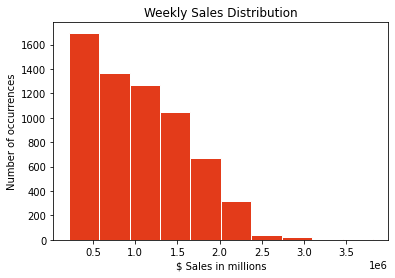

In [ ]:
x = df['Weekly_Sales']
plt.hist(x, color = '#e33b1a',edgecolor = 'white')
plt.title('Weekly Sales Distribution')
plt.ylabel('Number of occurrences')
plt.xlabel('$ Sales in millions')
plt.show()

#### °F Temperature

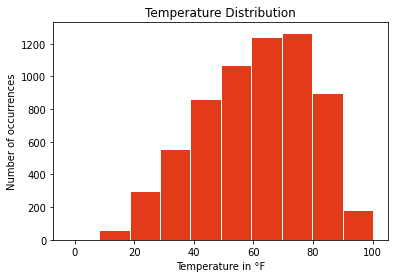

In [ ]:
x1 = df['Temperature']
plt.hist(x1, color = '#e33b1a',edgecolor = 'white')
plt.title('Temperature Distribution')
plt.ylabel('Number of occurrences')
plt.xlabel('Temperature in °F')
plt.show()

####Customer Age

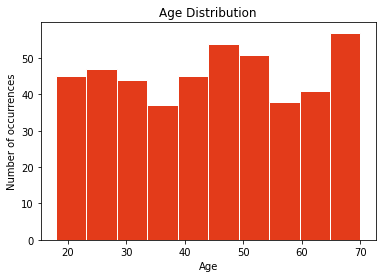

In [ ]:
x2 = sup_df['Age']
plt.hist(x2, color = '#e33b1a',edgecolor = 'white')
plt.title('Age Distribution')
plt.ylabel('Number of occurrences')
plt.xlabel('Age')
plt.show()

####Customer $ Amount Spent

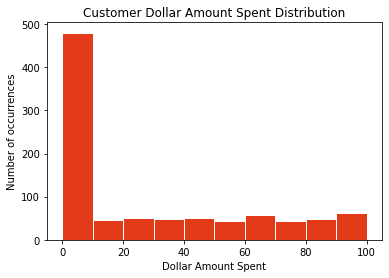

In [ ]:
x3 = reward_df['Amount_Spent']
plt.hist(x3, color = '#e33b1a',edgecolor = 'white')
plt.title('Customer Dollar Amount Spent Distribution')
plt.ylabel('Number of occurrences')
plt.xlabel('Dollar Amount Spent')
plt.show()

## **Check Assumptions**

### **Normal distribution check & graphs**


In [ ]:
shapiro_test = stats.shapiro(df['Weekly_Sales'])
shapiro_test.pvalue # from weekly sales, we can conclude that the population is normally distributed.

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


3.8115318229635024e-43

In [ ]:
anderson_test = stats.anderson(df['Weekly_Sales'], dist='norm')
anderson_test

AndersonResult(statistic=86.87863944682249, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
anderson_test = stats.anderson(df['Temperature'], dist='norm')
anderson_test

AndersonResult(statistic=32.88997095399918, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

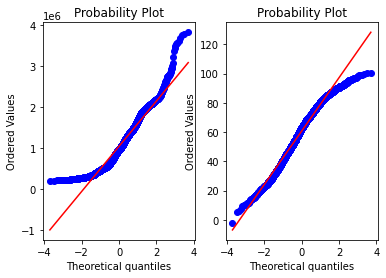

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
y = df['Weekly_Sales']

res = stats.probplot(y, plot=plt)

ax2 = fig.add_subplot(122)
x = df['Temperature']
res = stats.probplot(x, plot=plt)

In [ ]:
# Check skewness
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Store,0.000000,-1.201187
Weekly_Sales,0.668362,0.053141
Holiday_Flag,3.373499,9.383410
Temperature,-0.336768,-0.612801
Fuel_Price,-0.096158,-1.177378
CPI,0.063492,-1.839813
Unemployment,1.188144,2.639712
Fuel_Level,0.000748,-1.359010


In [ ]:
"""
df.insert(len(df.columns), 'Sqrt_Temperature',
         np.sqrt(max(df.iloc[:, 4]+1) - df.iloc[:, 4]))
"""

"\ndf.insert(len(df.columns), 'Sqrt_Temperature',\n         np.sqrt(max(df.iloc[:, 4]+1) - df.iloc[:, 4]))\n"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc83ed27250>,
      dtype=object)

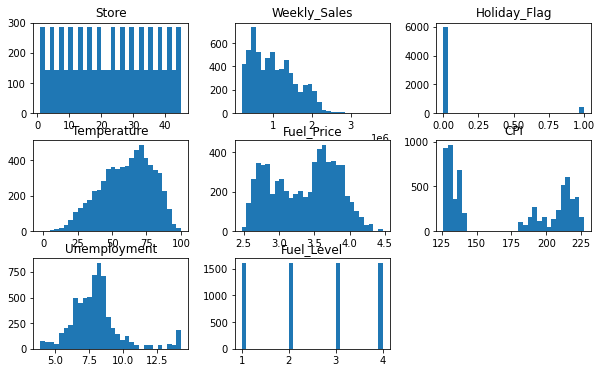

In [ ]:

df.hist(grid=False,
       figsize=(10, 6),
       bins=30)


## **Two-Sample T test**

### Two-sample t-test on holiday flag

In [ ]:
import scipy.stats as stats

In [ ]:
df_withouthf=df[df["Holiday_Flag"]==0]
df_withouthf=df_withouthf["Weekly_Sales" ]
#df_withouthf

In [ ]:
df_withhf=df[df["Holiday_Flag"]==1]
df_withhf=df_withhf["Weekly_Sales" ]
#df_withhf

In [ ]:
TstatsTwosampOnetail, PvalTwosampOnetail= stats.ttest_ind(df_withouthf,df_withhf,equal_var=False, alternative="less")
PvalTwosampOnetail

In [ ]:
SignLevel=0.05
if PvalTwosampOnetail<=SignLevel:
    print("We reject H0. The Holiday flag increases the sales")
else:
    print("We do not reject H0. We cannot conclude that the Holiday flag increases the sales")

### Two-sample t-test on Temperature

In [ ]:
#Split the Data of Sales into 2 groups, corresponding to sales of lower temperature and higher temperature
#We use the temperature 60.66f to split the data
#H0: u1-u2 = 0; Ha: u1-u2!= 0
# u1- lower temperature sales; u2-higher temperature sales
LowerTempSale = []
HigherTempSale = []

for i in range(len(df)):
    if df.iloc[i, 4] <= 60.66:
        LowerTempSale.append(df.iloc[i, 2])
    elif df.iloc[i, 4] > 60.66:
        HigherTempSale.append(df.iloc[i, 2])

In [ ]:
from scipy.stats import skew
plt.hist(LowerTempSale, 10, color = '#e33b1a',edgecolor = 'white' )
plt.title('Distribution of the Lower-temp Group')
plt.show() # Positively Skewed
print('The skewness is: ', skew(LowerTempSale))

In [ ]:
plt.hist(HigherTempSale, 10, color = '#e33b1a',edgecolor = 'white')
plt.title('Distribution of the Higher-temp Group')
plt.show() # Positively Skewed
print('The skewness is: ', skew(HigherTempSale))

In [ ]:
# Further confirm skewness
fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(LowerTempSale, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Lower-temp Probplot against normal distribution')
ax2 = fig.add_subplot(212)
prob = stats.probplot(HigherTempSale, dist=stats.norm, plot=ax2)
ax2.set_title('Higher-temp Probplot against normal distribution')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [ ]:
# Perform Square Root transformation
LowerTempSale= np.sqrt(LowerTempSale)
HigherTempSale = np.sqrt(HigherTempSale)

In [ ]:
# See the results after transformation
fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(LowerTempSale, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Lower-temp Probplot after Sqaure Root transformation')
ax2 = fig.add_subplot(212)
prob = stats.probplot(HigherTempSale, dist=stats.norm, plot=ax2)
ax2.set_title('Higher-temp Probplot after Sqaure Root transformation')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [ ]:
skew(LowerTempSale) #Close to zero now, and significantly lower than previous skewness level of 0.931

In [ ]:
skew(HigherTempSale) # Close to zero now

In [ ]:
#Check for equal variances for two samples
from scipy.stats import levene
test_stat, p_val_levene = levene(LowerTempSale,HigherTempSale)
print(p_val_levene)

In [ ]:
#Conduct the two-sided T-test and generate the p-value
TStats, PVal = stats.ttest_ind(LowerTempSale, HigherTempSale, equal_var = False)
print("P-value is:", PVal)

In [ ]:
#Conclusion of T-Test
if PVal <= 0.05:
    print("We reject H0. We conclude that temperature have an impact on sales")
else:
    print("We do not reject H0. We cannot conclude that temperature have an impact on sales")

###Conducting One-sided two sample t test
####to learn about the impact between difference in temperature on sales

In [ ]:
#H0: u1-u2 <= 0; Ha: u1-u2 > 0
# we want to know if lower temperature sales is higher than the sales with higher temperature
TestStatsTwoSampleHigherTail, PvalTwoSampleHigherTail = stats.ttest_ind(LowerTempSale,HigherTempSale, equal_var=True, alternative = "greater")
print("P-value is", PvalTwoSampleHigherTail)

In [ ]:
#Conclusion of T-Test
if PvalTwoSampleHigherTail <= 0.05:
    print("We reject H0. We conclude that the sales in lower temperature is higher than the sales in higher temperature ")
else:
    print("We fail to reject H0. We cannot conclude that the sales in lower temperature is higher than the sales in higher temperature")

### Effect Size

In [ ]:
from statsmodels.stats.power import tt_solve_power

In [ ]:
DesiredSampleSize1 = tt_solve_power(0.3539039615, alpha = 0.05, power = 0.95, alternative = "two-sided")
print("The desired sample size is:", DesiredSampleSize1, "\n")

In [ ]:
DesiredSampleSize2 = tt_solve_power(0.55, alpha = 0.05, power = 0.8, alternative = "two-sided")
print("The desired sample size is:", DesiredSampleSize2, "\n")

## ANOVA

###Two-way ANOVA

####Assumption Check for two-way ANOVA

In [ ]:
shapiro_test2 = stats.shapiro(df['Fuel_Price'])
shapiro_test2.pvalue

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


3.303561129645756e-41

In [ ]:
from scipy.stats import anderson
anderson(df['Fuel_Price'])

AndersonResult(statistic=106.48312955142501, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
anderson(df['CPI'])

AndersonResult(statistic=592.9850672520442, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
shapiro_test3 = stats.shapiro(df['CPI'])
shapiro_test3.pvalue

0.0

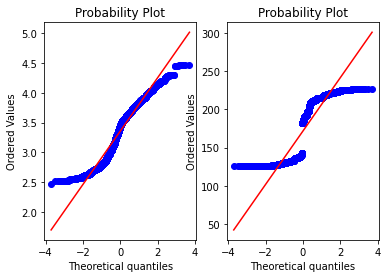

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
x2 = df['Fuel_Price']

res = stats.probplot(x2, plot=plt)

ax2 = fig.add_subplot(122)
x3 = df['CPI']
res = stats.probplot(x3, plot=plt)

####Two-Way ANOVA Model

In [ ]:
#Add 2 blank columns to store the levels of Fuel Price and CPI
df_2wayANOVA = df
df_2wayANOVA['Fuel_Level'] = np.nan
df_2wayANOVA['CPI_Level'] = np.nan
df_2wayANOVA.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Fuel_Level,CPI_Level
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,NaN
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,NaN,NaN
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,NaN,NaN
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,NaN,NaN
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,NaN,NaN


In [ ]:
#We assign 4 levels to Fuel Price levels, corresponding to the 4 quartiles of Fuel Price
for i in range(len(df_2wayANOVA)):
  if df_2wayANOVA.iloc[i, 5] <= 2.933:
    df_2wayANOVA.iloc[i, 8] = 1
  elif df_2wayANOVA.iloc[i, 5] > 2.933 and df_2wayANOVA.iloc[i, 5] <= 3.445:
    df_2wayANOVA.iloc[i, 8] = 2
  elif df_2wayANOVA.iloc[i, 5] > 3.445 and df_2wayANOVA.iloc[i, 5] <= 3.735:
    df_2wayANOVA.iloc[i, 8] = 3
  elif df_2wayANOVA.iloc[i, 5] > 3.735:
    df_2wayANOVA.iloc[i, 8] = 4

df_2wayANOVA.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Fuel_Level,CPI_Level
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1.0,NaN
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1.0,NaN
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1.0,NaN
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1.0,NaN
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1.0,NaN


In [ ]:
#We then assign 4 levels to CPI, corresponding to the 4 quartiles
df_2wayANOVA2 = df_2wayANOVA

for i in range(6435):
  if df_2wayANOVA2.iloc[i, 6] <= 131.735:
    df_2wayANOVA2.iloc[i, 9] = "a"
  elif df_2wayANOVA2.iloc[i, 6] > 131.735 and df_2wayANOVA2.iloc[i, 6] <= 182.616:
    df_2wayANOVA2.iloc[i, 9] = "b"
  elif df_2wayANOVA2.iloc[i, 6] > 182.616 and df_2wayANOVA2.iloc[i, 6] <= 212.743:
    df_2wayANOVA2.iloc[i, 9] = "c"
  else:
    df_2wayANOVA2.iloc[i, 9] = "d"

df_2wayANOVA2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Fuel_Level,CPI_Level
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1.0,c
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1.0,c
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1.0,c
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1.0,c
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1.0,c


In [ ]:
#Create a new dataframe to store the levels and the corresponding sales
df_2wayfinal=df_2wayANOVA2[["Store", "Fuel_Level","CPI_Level","Weekly_Sales"]]
df_2wayfinal.head()

,Store,Fuel_Level,CPI_Level,Weekly_Sales
0,1,1.0,c,1643690.90
1,1,1.0,c,1641957.44
2,1,1.0,c,1611968.17
3,1,1.0,c,1409727.59
4,1,1.0,c,1554806.68


In [ ]:
#build the ANOVA model and fit the data
from statsmodels.formula.api import ols
TwoWayAnova = ols('Weekly_Sales ~ C(Fuel_Level) + C(CPI_Level) + C(Fuel_Level):C(CPI_Level)', data = df_2wayfinal).fit()
print(TwoWayAnova)
print(sm.stats.anova_lm(TwoWayAnova, typ=2))

                                  sum_sq      df          F        PR(>F)
C(Fuel_Level)               1.515813e+12     3.0   1.615221  1.835666e-01
C(CPI_Level)                1.931783e+13     3.0  20.584711  2.860658e-13
C(Fuel_Level):C(CPI_Level)  2.121444e+13     9.0   7.535236  4.701553e-11
Residual                    2.007981e+15  6419.0        NaN           NaN


In [ ]:
if 1.835666e-01 <= 0.05:
  print("there is significant interaction between Fuel Price and Sales")
else:
  print("there is no significant interaction between Fuel Price and Sales")

there is no significant interaction between Fuel Price and Sales


In [ ]:
if 2.860658e-13 <= 0.05:
  print("there is significant interaction between CPI and Sales")
else:
  print("there is no significant interaction between CPI and Sales")

there is significant interaction between CPI and Sales


In [ ]:
if 4.701553e-11 <= 0.05:
  print("there is significant interaction between CPI and Fuel Price")
else:
  print("there is no significant interaction between CPI and Fuel Price")

there is significant interaction between CPI and Fuel Price


###Interaction Plot of 2-way ANOVA

<function matplotlib.pyplot.show(*args, **kw)>

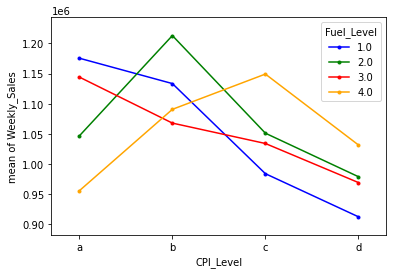

In [ ]:
#build the interaction plot and check for interaction between levels and variables
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x = df_2wayfinal['CPI_Level'],
                       trace = df_2wayfinal['Fuel_Level'],
                       response = df_2wayfinal['Weekly_Sales'],
                       colors=['blue', 'green', 'red', 'orange'])
plt.show

###Tukey

In [ ]:
pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 3.9 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=a3d000260c5782bd334a38e0e81a3905ec9435349cb2b61470a38a8451668379
  Stored in directory: /root/.cache/pip/wheels/93/5b/a8/2be2669621c3c344d362eb6703e5fd7b6ece47a6b5ab35b207
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=cda922b5da945a4c460fc9ad81bd0c22d0189616fd3a9d3e7c2b46129504aa7f
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built bioinfokit adjustText


In [ ]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Fuel_Level
res.tukey_hsd(df=df_2wayfinal, res_var='Weekly_Sales', xfac_var='Fuel_Level', anova_model='Weekly_Sales ~ C(Fuel_Level) + C(CPI_Level) + C(Fuel_Level):C(CPI_Level)')
res.tukey_summary

# # Note: p-value 0.001 from tukey_hsd output should be interpreted as <=0.001


/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1.0,2.0,26254.803659,-24416.893125,76926.500443,1.882955,0.537837
1,1.0,3.0,1194.029070,-49406.891416,51794.949556,0.085754,0.900000
2,1.0,4.0,10015.921850,-40687.454279,60719.297979,0.717878,0.900000
3,2.0,3.0,27448.832729,-23199.370736,78097.036194,1.969502,0.503489
4,2.0,4.0,16238.881809,-34511.681844,66989.445462,1.162818,0.823640
5,3.0,4.0,11209.950920,-39469.946575,61889.848415,0.803831,0.900000


In [ ]:
# for interaction effect between genotype and years
res.tukey_hsd(df=df_2wayfinal, res_var='Weekly_Sales', xfac_var='CPI_Level', anova_model='Weekly_Sales ~ C(Fuel_Level) + C(CPI_Level) + C(Fuel_Level):C(CPI_Level)')
res.tukey_summary

/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,c,d,54147.757428,3484.017595,104811.497261,3.884005,0.030758
1,c,a,34414.378516,-16217.932176,85046.689209,2.470067,0.299839
2,c,b,93962.598405,43251.457654,144673.739157,6.733614,0.001000
3,d,a,88562.135945,37921.951495,139202.320394,6.355495,0.001000
4,d,b,148110.355834,97391.353563,198829.358105,10.612344,0.001000
5,a,b,59548.219889,8860.612492,110235.827286,4.269368,0.013580


In [ ]:
# for main effect of interation
pd.set_option("display.max_rows",None)
res.tukey_hsd(df=df_2wayfinal, res_var='Weekly_Sales', xfac_var=["Fuel_Level","CPI_Level"], anova_model='Weekly_Sales ~ C(Fuel_Level) + C(CPI_Level) + C(Fuel_Level):C(CPI_Level)')
res.tukey_summary

/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(1.0, c)","(1.0, d)",71498.042417,-74784.310482,217780.395317,2.369217,0.900000
1,"(1.0, c)","(1.0, a)",191561.491520,59278.578022,323844.405017,7.019513,0.001000
2,"(1.0, c)","(1.0, b)",149488.726392,22575.754426,276401.698359,5.709591,0.005546
3,"(1.0, c)","(2.0, c)",67178.092832,-65960.223581,200316.409245,2.445835,0.900000
4,"(1.0, c)","(2.0, d)",4989.913726,-106649.374889,116629.202342,0.216660,0.900000
5,"(1.0, c)","(2.0, a)",62767.254057,-47314.575405,172849.083520,2.763885,0.829061
6,"(1.0, c)","(2.0, b)",229129.576222,106586.247224,351672.905220,9.063460,0.001000
7,"(1.0, c)","(3.0, c)",50086.375584,-76410.853030,176583.604198,1.919292,0.900000
8,"(1.0, c)","(3.0, d)",14707.316902,-86593.747551,116008.381355,0.703756,0.900000
9,"(1.0, c)","(3.0, a)",160242.312226,36112.829290,284371.795163,6.257557,0.001072


In [ ]:
tukey_int_result = res.tukey_summary
tukey_inter_signif = tukey_int_result.loc[tukey_int_result['p-value'] <= 0.05]
tukey_inter_signif

,group1,group2,Diff,Lower,Upper,q-value,p-value
1,"(1.0, c)","(1.0, a)",191561.491520,59278.578022,323844.405017,7.019513,0.001000
2,"(1.0, c)","(1.0, b)",149488.726392,22575.754426,276401.698359,5.709591,0.005546
6,"(1.0, c)","(2.0, b)",229129.576222,106586.247224,351672.905220,9.063460,0.001000
9,"(1.0, c)","(3.0, a)",160242.312226,36112.829290,284371.795163,6.257557,0.001072
11,"(1.0, c)","(4.0, c)",165270.318583,18987.965683,311552.671482,5.476530,0.010552
14,"(1.0, c)","(4.0, b)",106744.866119,4500.470829,208989.261408,5.060694,0.030476
15,"(1.0, d)","(1.0, a)",263059.533937,91274.477063,434844.590810,7.422859,0.001000
16,"(1.0, d)","(1.0, b)",220986.768810,53301.829071,388671.708548,6.388145,0.001000
20,"(1.0, d)","(2.0, b)",300627.618639,136225.051617,465030.185662,8.863859,0.001000
23,"(1.0, d)","(3.0, a)",231740.354644,66152.115038,397328.594250,6.783826,0.001000


In [ ]:
inter_analysis = pd.DataFrame(tukey_inter_signif.iloc[6,:])
inter_analysis = inter_analysis.transpose()
inter_analysis = inter_analysis.append(tukey_inter_signif.iloc[19,:])
inter_analysis = inter_analysis.append(tukey_inter_signif.iloc[27,:])
inter_analysis

,group1,group2,Diff,Lower,Upper,q-value,p-value
15,"(1.0, d)","(1.0, a)",263059.533937,91274.477063,434844.59081,7.422859,0.001
66,"(2.0, d)","(2.0, b)",234119.489948,99609.237416,368629.74248,8.436936,0.001
99,"(3.0, d)","(3.0, a)",174949.629129,47345.381608,302553.876649,6.645849,0.001


## Heterogeneity Analysis

### By Age Group (Seperate Dataset used)

In [ ]:
# We want to know if there is a difference between people younger than 50 and people older than 50
# when it comes to checkout preference
from scipy.stats import chi2_contingency
sup_df.head()

In [ ]:
Age = sup_df.iloc[:,1]
Preference = sup_df.iloc[:,3]
counter = Age.count()

AG1andCashier = []

AG1andSelf = []

AG2andCashier = []

AG2andSelf = []

for a in range(counter):

  if Age[a] < 60 and Preference[a] == "Cashier":

    AG1andCashier.append(a)

  if Age[a] < 60 and Preference[a] == "Self-checkout":

    AG1andSelf.append(a)

  if Age[a] >= 60 and Preference[a] == "Cashier":

    AG2andCashier.append(a)

  if Age[a] >= 60 and Preference[a] == "Self-checkout":

    AG2andSelf.append(a)

heter_df = [[len(AG1andCashier),len(AG1andSelf)],[len(AG2andCashier), len(AG2andSelf)]]

print(heter_df)

In [ ]:
test_stats, pval, dof, expected_cell_counts = chi2_contingency(heter_df)
print(expected_cell_counts)
print("\n")
print("the pval for chi^2 is: ", round(pval,2))

sig_level = 0.1
if pval <= sig_level:
    print("We reject H0. The populations are not homogeneous with respect to age. \n")
else:
    print("We fail to reject H0. We cannot conclude that the populations are not homogeneous with respect to age. \n")

### By Age & Employment Status (Seperate Dataset used)

In [ ]:
EmployStat = sup_df.iloc[:,2]

ES1andCashier = []

ES1andSelf = []

ES2andCashier = []

ES2andSelf = []

for a in range(counter):

  if Age[a] < 60 and EmployStat[a] == 0 and Preference[a] == "Cashier":

    ES1andCashier.append(a)

  if Age[a] < 60 and EmployStat[a]  == 0 and Preference[a] == "Self-checkout":

    ES1andSelf.append(a)

  if Age[a] >= 60 and EmployStat[a] == 1 and Preference[a] == "Cashier":

    ES2andCashier.append(a)

  if Age[a] >= 60 and EmployStat[a] == 1 and Preference[a] == "Self-checkout":

    ES2andSelf.append(a)

heter_df1 = [[len(ES1andCashier),len(ES1andSelf)],[len(ES2andCashier), len(ES2andSelf)]]

print(heter_df1)

In [ ]:
test_stats1, pval1, dof1, expected_cell_counts1 = chi2_contingency(heter_df1)
print(expected_cell_counts1)
print("\n")
print("the pval for chi^2 is: ", round(pval1,3))

sig_level = 0.1
if pval1 <= sig_level:
    print("We reject H0. The populations are not homogeneous with respect to age. \n")
else:
    print("We fail to reject H0. We cannot conclude that the populations are not homogeneous with respect to age. \n")

## Regression Analysis

###Regression(Seperate Dataset)

####No Covariate

In [ ]:
reward_df.head()

In [ ]:
X3 = reward_df.iloc[:,6]
X3 = sm.add_constant(X3)
y3 = reward_df.iloc[:,5]

est4 = sm.OLS(y3, X3)
est5 = est4.fit()
print(est5.summary())

####With Covariate

In [ ]:
X4 = reward_df.iloc[:,np.r_[4:5, 6:7]]
X4 = sm.add_constant(X4)
est6 = sm.OLS(y3, X4)
est7 = est6.fit()
print(est7.summary())

##DoWhy
using the first dataset

In [ ]:
reward_df2 = reward_df
reward_df2.head()

In [ ]:
reward_df2['Reward2'] = np.nan
reward_df2['Online2'] = np.nan
reward_df2

In [ ]:
#revise dataset in order to fit dowhy
for i in range(len(reward_df2)):
  if reward_df2.iloc[i,6] == 1:
    reward_df2.iloc[i,8] = True
  else:
    reward_df2.iloc[i,8] = False

for i in range(len(reward_df2)):
  if reward_df2.iloc[i,7] == 1:
    reward_df2.iloc[i,9] = True
  else:
    reward_df2.iloc[i,9] = False
reward_df2

In [ ]:
reward_df3 = reward_df2.drop(['Shop_Online', 'Reward','Online'],axis = 1)
reward_df3

In [ ]:
!pip install dowhy

In [ ]:
pip install econml

In [ ]:
## import package
import dowhy
from dowhy import CausalModel
import warnings
warnings.filterwarnings('ignore')


In [ ]:
causal_graph = """
digraph {
Age;
Online2;
Annual_Income;
Amount_Spent;
Reward2;
Reward2 -> Amount_Spent;
Age -> Reward2
Age -> Amount_Spent; Online2 -> Amount_Spent;
Annual_Income -> Amount_Spent;
}
"""
#
#Age -> Online2; Online2 -> Amount_Spent;
#Age -> Annual_Income;
#
from dowhy import CausalModel

from IPython.display import Image, display

In [ ]:
model= CausalModel(
        data = reward_df3,
        graph=causal_graph.replace("\n", " "),
        treatment='Reward2',
        outcome='Amount_Spent')
model.view_model()

In [ ]:
estimands = model.identify_effect()
estimands

In [ ]:
causal_estimate_match = model.estimate_effect(estimands,
                                              method_name="backdoor.propensity_score_matching",
                                              target_units="ate",
                                              test_significance=True)
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))

In [ ]:
causal_estimate_reg = model.estimate_effect(estimands,
                                            method_name="backdoor.linear_regression",
                                            test_significance=True)
print("Causal Estimate is " + str(causal_estimate_reg.value))

In [ ]:
refutel = model.refute_estimate(estimands,causal_estimate_reg,
                                            method_name = "data_subset_refuter", num_simulations=20)
print(refutel)

In [ ]:
refute_results_reg = model.refute_estimate(estimands, causal_estimate_reg,
                                            method_name="placebo_treatment_refuter", num_simulations=20)
print(refute_results_reg)

## Attempt2

In [ ]:
#df['Holidayflag2'] = np.nan
#df

In [ ]:
#revise dataset in order to fit dowhy
#for i in range(len(df)):
 # if df.iloc[i,3] == 1:
  #  df.iloc[i,8] = True
  #else:
   # df.iloc[i,8] = False

#df

In [ ]:
#causal_graph2 = """
#digraph {
#Date;
#Temperature;
#Weekly_Sales;
#Holiday_Flag2;
#Unemployment;
#Date -> Temperature; Temperature -> Weekly_Sales;
#Holiday_Flag2 -> Weekly_Sales;
#Unemployment -> CPI;CPI -> Weekly_Sales;
#Fuel_Price -> CPI
#}
#"""

In [ ]:
#model2= CausalModel(
 #       data = df,
  ##      graph=causal_graph.replace("\n", " "),
    #    treatment='Holidayflag2',
     #   outcome='Weekly_Sales')
#model2.view_model()
#display(Image(filename="causal_model.png"))